In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_34752_I')

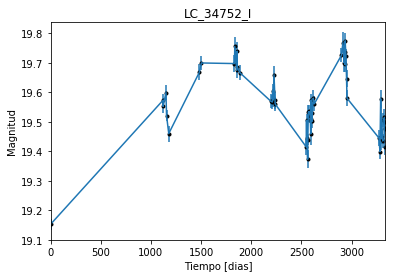

In [2]:
data = np.genfromtxt('LC_34752_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_34752_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

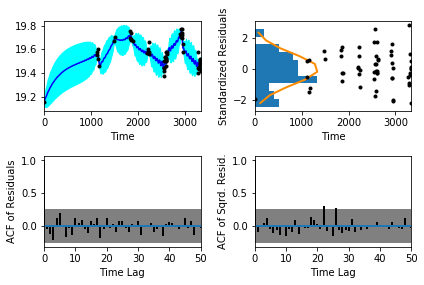

In [5]:
sample.assess_fit()

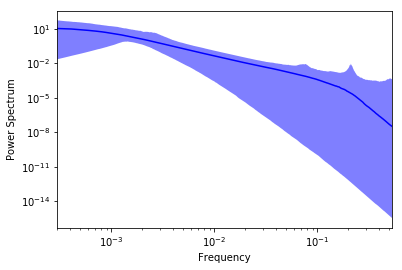

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_34752_I')

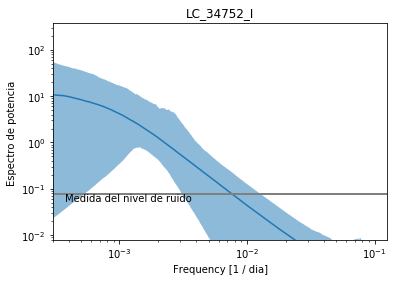

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_34752_I')

Text(0.5,1,'Prediccion , valor esperado LC_34752_I')

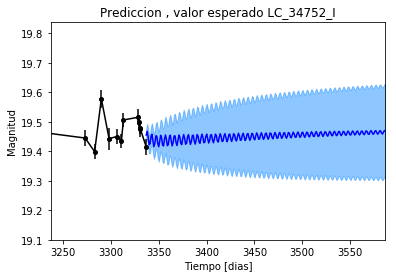

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_34752_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_34752_I')

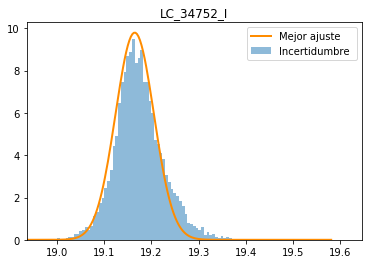

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_34752_I')

Text(0.5,1,'Interpolacion, camino simulado LC_34752_I')

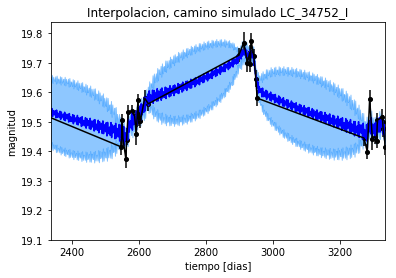

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34752_I')

Text(0.5,1,'Interpolacion, camino simulado LC_34752_I')

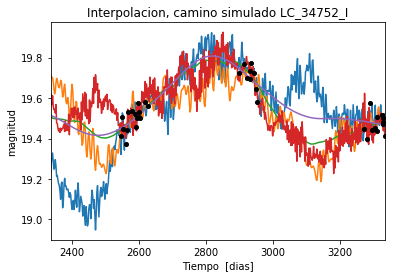

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34752_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 741.665105484
Median: 0.0197094426155
Standard deviation: 0.185780079305
68% credibility interval: [ 0.00213332  0.17771347]
95% credibility interval: [  4.11850137e-04   7.47564847e-01]
99% credibility interval: [  3.19310471e-04   9.96496005e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 263.69833609
Median: 0.0114670983541
Standard deviation: 0.120666095175
68% credibility interval: [ 0.00083251  0.08996606]
95% credibility interval: [  3.40738823e-04   4.57691320e-01]
99% credibility interval: [  3.07172146e-04   7.87498761e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 210.832559491
Median: 0.041164321841
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 312.830973534
Median: 101.603638183
Standard deviation: 2.14052870734
68% credibility interval: [  99.46675302  103.56040058]
95% credibility interval: [  97.08572713  105.56651906]
99% credibility interval: [  95.25809524  106.39918738]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 400.254528446
Median: 1.08328201861
Standard deviation: 2.48437972926
68% credibility interval: [ 0.16833294  4.82936666]
95% credibility interval: [ 0.02548691  8.54672718]
99% credibility interval: [  0.01169595  11.4216187 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 553.965754119
Median: 1.90733540118
Standard deviation: 13.0158012309
68% credibility interval: [  0.12243806  19.43629114]
95% credibility interval: [  1.08983059e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1074.53024709
Median: 4.24943063954e-08
Standard deviation: 3.9920972646e+83
68% credibility interval: [  3.11608857e-47   1.97425109e+31]
95% credibility interval: [  1.34668185e-79   6.63391433e+57]
99% credibility interval: [  6.36071459e-89   1.10478545e+72]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 985.20958253
Median: 19.5295872197
Standard deviation: 0.0851198596944
68% credibility interval: [ 19.44152737  19.59371805]
95% credibility interval: [ 19.33013343  19.6619596 ]
99% credibility interval: [ 19.23090615  19.74165463]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 244.530316251
Median: 0.145596346955
Standard deviation: 0.297493092228
68% credibility interval: [  1.34765508e-04   6.09969037e-01]
95% credibility interval: [ 0.          1.00955876]
99% credibility interval: [ 0.          1.05465571]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 244.530316251
Median: 0.145596346955
Standard deviation: 0.297493092228
68% credibility interval: [  1.34765508e-04   6.09969037e-01]
95% credibility interval: [ 0.          1.00955876]
99% credibility interval: [ 0.          1.05465571]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 927.808364461
Median: 0.0
Standard deviation: 0.0006

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 312.830973534
Median: 101.603638183
Standard deviation: 2.14052870734
68% credibility interval: [  99.46675302  103.56040058]
95% credibility interval: [  97.08572713  105.56651906]
99% credibility interval: [  95.25809524  106.39918738]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2445.22909955
Median: 0.028826574541
Standard deviation: 0.0290002617632
68% credibility interval: [ 0.01862846  0.04840324]
95% credibility interval: [ 0.01304576  0.09621484]
99% credibility interval: [ 0.01110923  0.19775304]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 441.289735691
Median: 1.31926330553
Standard deviation: 0.316854074281
68% credibility interval: [ 1.01579975  1.71184131]
95% credibility interval: [ 0.801989    1.94589595]
99% credibility interval: [ 0.70071398  1.9842542 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 872.845501953
Median: 0.00014181762453
Standard deviation: 0.38645447287
68% credibility interval: [  1.48385472e-33   6.16598974e-02]
95% credibility interval: [  6.08192268e-59   1.18971041e+00]
99% credibility interval: [  8.60100483e-75   2.85643401e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 741.665105484
Median: (-0.123838080254-0.102583346561j)
Standard deviation: 2.20374497948
68% credibility interval: [-1.11660668-5.75421816j -0.01340402-1.1740089j ]
95% credibility interval: [ -4.69708846e+00-3.61826135j  -2.58773073e-03-0.00505433j]
99% credibility interval: [ -6.26116906e+00+0.j          -2.00628686e-03-0.19302697j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 263.69833609
Median: (-0.0720499038943+1.66301519719j)
Standard deviation: 2.01711236678
68% credibility interval: [-0.56527345+3.10083307j -0.00523082+0.j        ]
95% credibility interval: [ -2.87575938e+00+6.02331344j  -2.14092516e-03+0.01546405j]
99% credibility interval: [ -4.94800064e+00+3.42523783j  -1.93001952e-03+0.00669613j]
Poste